# One Way ANOVA - Application

Sporting
goods manufacturing company wanted to compare the distance traveled
by golf balls produced using four different designs . Ten balls were manufactured
with each design and were brought to the local golf course for the club
professional to test . The order in which the balls were hit with the same club
from the first tee was randomized so that the pro did not know which type of ball
was being hit. All 40 balls were hit in a short period of time, during which the
environmental conditions were essentially the same. The results (distance
traveled in yards) for the four Designs are stored in Golfball.csv
At the 0.05 level of significance, is there evidence of a
difference in the mean
distances traveled by the golf balls with different designs?

In [1]:
import numpy as np #for mathematical purposes
import pandas as pd #for file handling
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison    # For post-hoc Testing, multicomparision is used for data convesion in a table format which is acceptable for tukeyhsd test i.e pairwise t tests
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
DF = pd.read_csv('Golfball.csv')

In [3]:
DF.head()

,Design,Distance
0,Design1,206.32
1,Design1,207.94
2,Design1,206.19
3,Design1,204.45
4,Design1,209.65


In [4]:
DF.describe()

,Distance
count,40.000000
mean,220.085000
std,9.697758
min,203.810000
25%,211.580000
50%,221.485000
75%,228.390000
max,235.450000


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Design    40 non-null     object 
 1   Distance  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


In [6]:
DF.Design = pd.Categorical(DF.Design)

In [7]:
DF['Design'].value_counts

<bound method IndexOpsMixin.value_counts of 0     Design1
1     Design1
2     Design1
3     Design1
4     Design1
5     Design1
6     Design1
7     Design1
8     Design1
9     Design1
10    Design2
11    Design2
12    Design2
13    Design2
14    Design2
15    Design2
16    Design2
17    Design2
18    Design2
19    Design2
20    Design3
21    Design3
22    Design3
23    Design3
24    Design3
25    Design3
26    Design3
27    Design3
28    Design3
29    Design3
30    Design4
31    Design4
32    Design4
33    Design4
34    Design4
35    Design4
36    Design4
37    Design4
38    Design4
39    Design4
Name: Design, dtype: category
Categories (4, object): [Design1, Design2, Design3, Design4]>

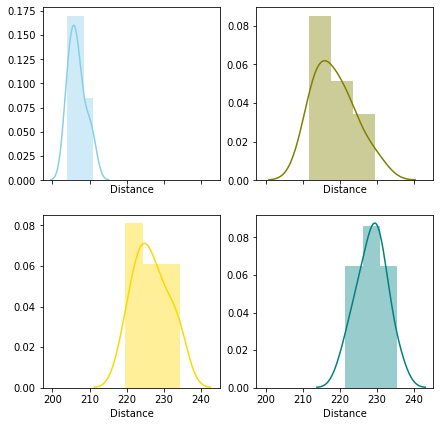

In [8]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( DF[DF['Design'] == "Design1"].Distance , color="skyblue", ax=axes[0, 0])
sns.distplot( DF[DF['Design'] == "Design2"].Distance , color="olive", ax=axes[0, 1])
sns.distplot( DF[DF['Design'] == "Design3"].Distance , color="gold", ax=axes[1, 0])
sns.distplot( DF[DF['Design'] == "Design4"].Distance , color="teal", ax=axes[1, 1])

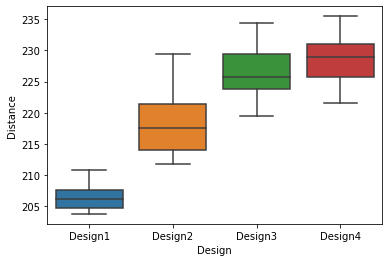

In [9]:
sns.boxplot(x='Design', y='Distance', data=DF)

In [10]:
formula = 'Distance ~ C(Design)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

             df     sum_sq     mean_sq          F        PR(>F)
C(Design)   3.0  2990.9898  996.996600  53.029822  2.731991e-13
Residual   36.0   676.8244   18.800678        NaN           NaN


In [11]:
mc = MultiComparison(DF['Distance'], DF['Design'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Design1 Design2   11.902  0.001  6.6795 17.1245   True
Design1 Design3   19.974  0.001 14.7515 25.1965   True
Design1 Design4   22.008  0.001 16.7855 27.2305   True
Design2 Design3    8.072  0.001  2.8495 13.2945   True
Design2 Design4   10.106  0.001  4.8835 15.3285   True
Design3 Design4    2.034 0.7007 -3.1885  7.2565  False
------------------------------------------------------
['Design1' 'Design2' 'Design3' 'Design4']


So, at the 0.05 level of significance, there is huge evidence of a difference in the mean distances traveled by the golf balls with different designs as depicted from above statistics and hence null hypothesis can be rejected.